In [3]:
library(tidyverse)
library(zeallot)
library(magrittr)
source("../../R/exp-utils.R")
source("../../R/plot-utils.R")
source("../../R/alg/cma-es-csa.R")
source("../../R/alg/cma-es-classic.R")
source("../../R/alg/cma-es-ppmf.R")
source("../../R/alg/cma-es-ppmf-classic.R")
options(repr.plot.width=15, repr.plot.height=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### Funkcje testowe

In [60]:
# F-cja sferyczna
sphere_func = . %>% crossprod(.)
attributes(sphere_func) = c(attributes(sphere_func), name = "sphere")

run_exp = function(d_params, p_targets, alg, func, dim, x0) {
    expand.grid(
        dp = d_params,
        pt = p_targets
    ) %>%
    furrr::future_pmap_dfr(function(dp, pt) {
        result = 
            alg(rep(x0, dim), fn = function(x) func(x), lower = -100, upper = 100, control = list(d_param = dp, p_target = pt, sigma = 1))
        iter = result %>% purrr::pluck("diagnostic", "bestVal") %>% length() 
        data.frame(
            t = 1:iter,
            sigma = result %>% purrr::pluck("diagnostic", "sigma") %>% as.numeric(),
            best_sofar = result %>% purrr::pluck("diagnostic", "bestVal") %>% as.numeric(),
            best_val = get_best_value(result, func),
            d_param = as.character(dp),
            p_target = as.character(pt)
        )
    })
}

#### Parametry

In [61]:
dparam = c(0.001, 0.01, 0.1, 0.5, 0.7, 0.8, 1, 2, 10)
p_targets = c(0.1, 0.5)
dim = 2
x0 = 100

In [62]:
data = 
    run_exp(dparam, p_targets, cma_es_ppmf, sphere_func, dim, x0)

Warning message:
“'values()' is deprecated.
Use 'value()' instead.
See help("Deprecated") and help("future-deprecated").”
Warning message:
“UNRELIABLE VALUE: Future (‘<none>’) unexpectedly generated random numbers without specifying argument '[future.]seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify argument '[future.]seed', e.g. 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use [future].seed=NULL, or set option 'future.rng.onMisuse' to "ignore".”


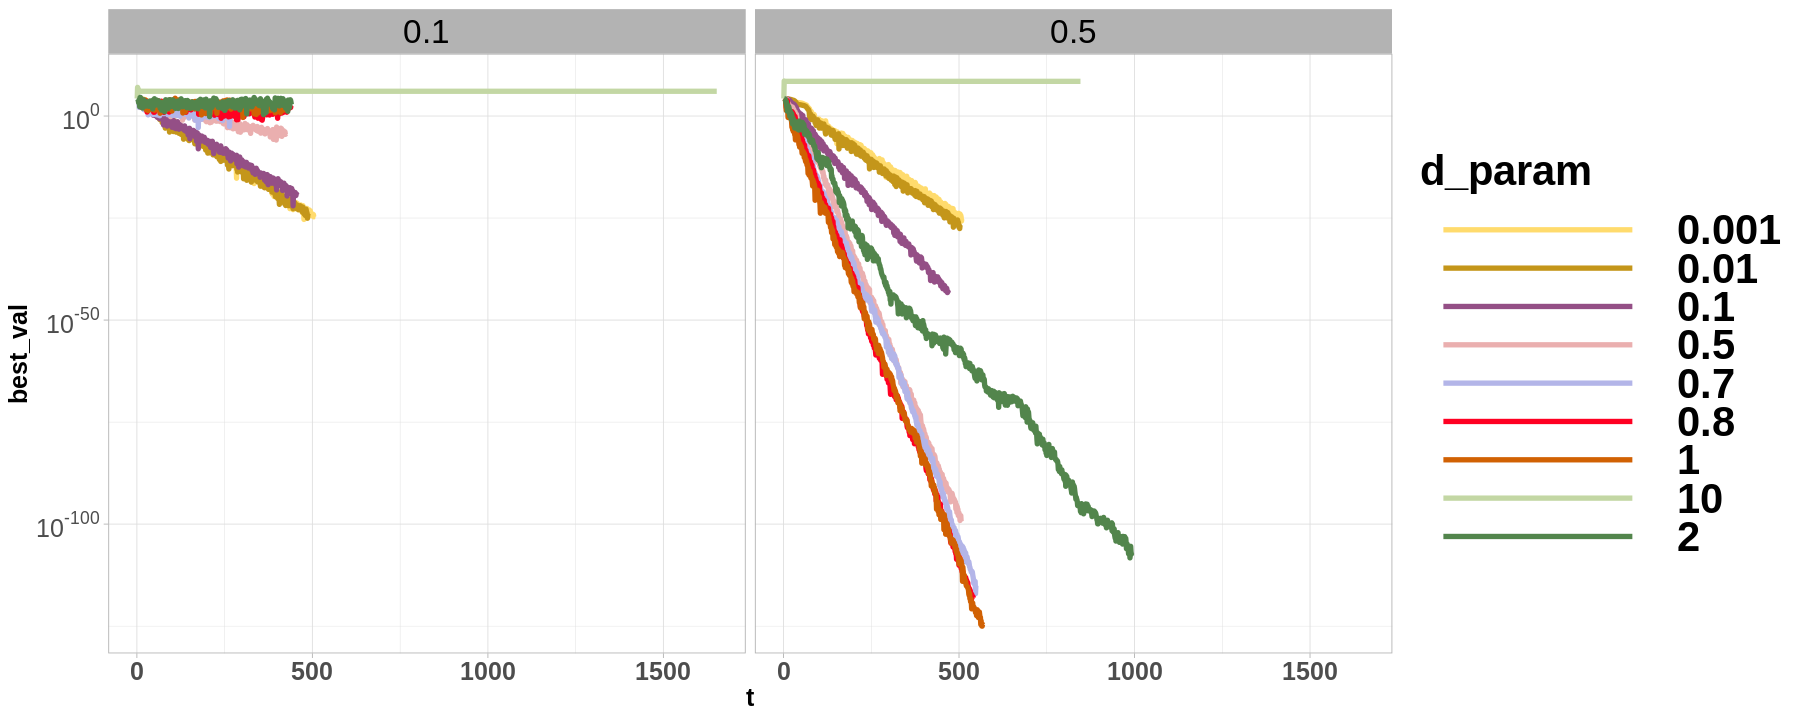

In [63]:
data %>% vg_plot("best_val", "d_param", scale_y_log = 1) + facet_wrap( ~ p_target)

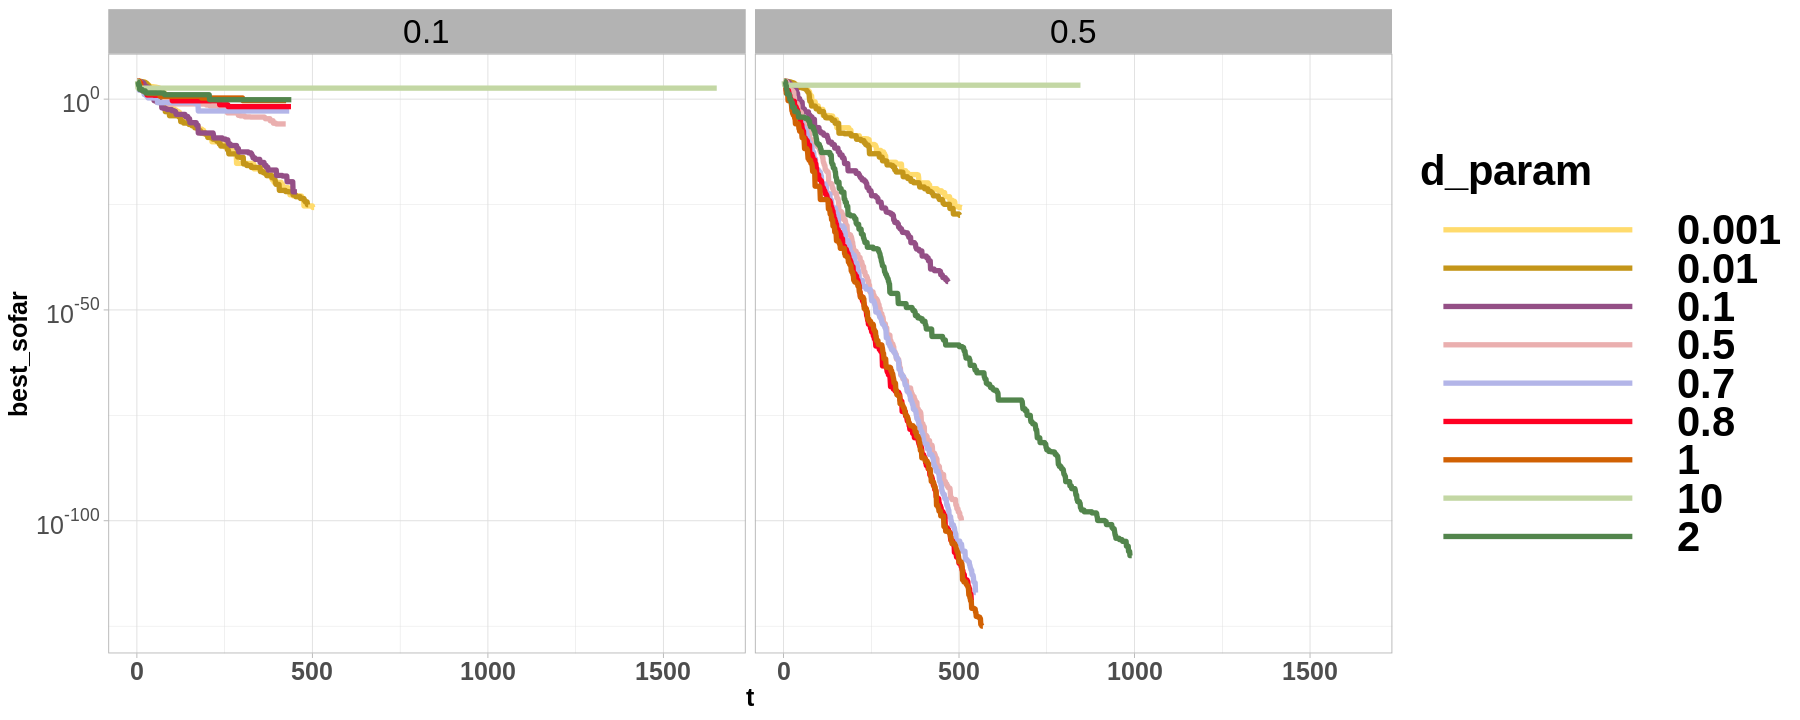

In [64]:
data %>% vg_plot("best_sofar", "d_param", scale_y_log = 1) + facet_wrap( ~ p_target)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


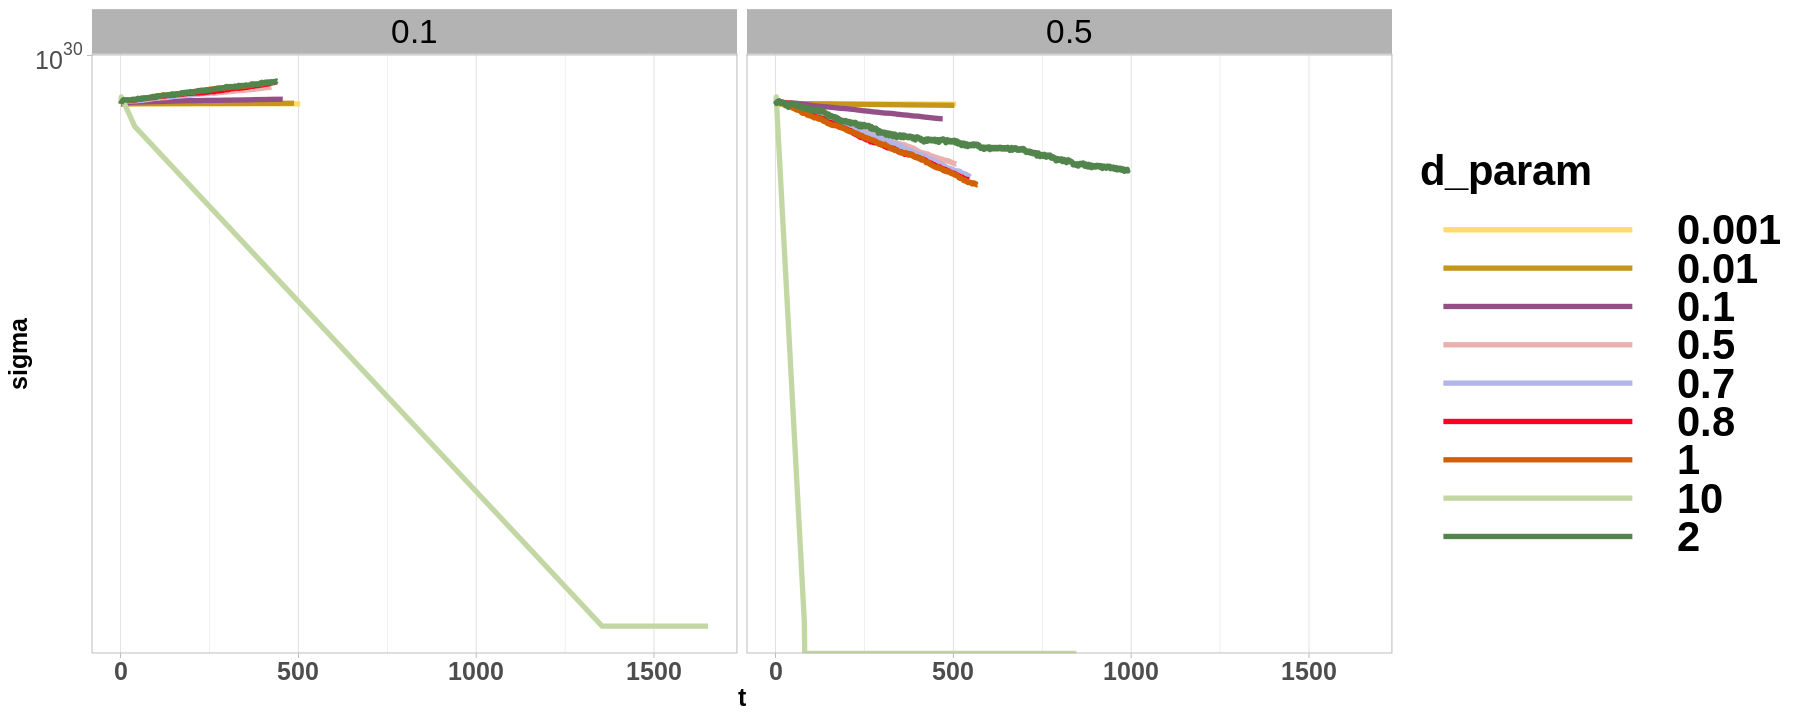

In [65]:
data %>% vg_plot("sigma", "d_param", scale_y_log = 1) + facet_wrap( ~ p_target)